In [31]:
import tensorflow as tf
import numpy as np
import matplotlib
import os
import matplotlib.pyplot as plt

In [46]:
import pandas as pd
df = pd.read_csv('bitcoin_transactions.csv')
df = pd.DataFrame (df,columns=['date', 'open', 'high', 'low', 'close', 'volume', 'market_cap'])

df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['year']= df['date'].dt.year
df['month']= df['date'].dt.month
df['day']= df['date'].dt.day

In [47]:
df

,date,open,high,low,close,volume,market_cap,year,month,day
0,2021-02-28,"46,194.02","46,716.43","43,241.62","45,137.77","53,443,887,451","841,428,977,515",2021,2,28
1,2021-02-27,"46,344.77","48,253.27","45,269.03","46,188.45","45,910,946,382","860,978,135,421",2021,2,27
2,2021-02-26,"47,180.46","48,370.79","44,454.84","46,339.76","350,967,941,479","863,752,275,053",2021,2,26
3,2021-02-25,"49,709.08","51,948.97","47,093.85","47,093.85","54,506,565,949","877,766,126,138",2021,2,25
4,2021-02-24,"48,835.09","51,290.14","47,213.50","49,705.33","63,695,521,388","926,393,090,751",2021,2,24
...,...,...,...,...,...,...,...,...,...,...
1880,2016-01-06,431.86,431.86,426.34,429.11,"34,042,500","6,458,942,098",2016,1,6
1881,2016-01-05,433.07,434.18,429.68,431.96,"34,522,600","6,500,393,256",2016,1,5
1882,2016-01-04,430.06,434.52,429.08,433.09,"38,477,500","6,515,713,340",2016,1,4
1883,2016-01-03,433.58,433.74,424.71,430.01,"39,633,800","6,467,429,942",2016,1,3


In [48]:
df['open']=df['open'].apply(lambda x: x.replace(',',''))
df['high']=df['high'].apply(lambda x: x.replace(',',''))
df['low']=df['low'].apply(lambda x: x.replace(',',''))
df['close']=df['close'].apply(lambda x: x.replace(',',''))
df['volume']=df['volume'].apply(lambda x: x.replace(',',''))
df['market_cap']=df['market_cap'].apply(lambda x: x.replace(',',''))

df['open'] = df['open'].astype(float)
df['high'] = df['high'].astype(float)
df['low'] = df['low'].astype(float)
df['close'] = df['close'].astype(float)
df['volume'] = df['volume'].astype(float)
df['market_cap'] = df['market_cap'].astype(float)


In [49]:
df.drop('date', inplace=True, axis=1)

In [50]:
df.to_numpy

<bound method DataFrame.to_numpy of           open      high       low     close        volume    market_cap  \
0     46194.02  46716.43  43241.62  45137.77  5.344389e+10  8.414290e+11   
1     46344.77  48253.27  45269.03  46188.45  4.591095e+10  8.609781e+11   
2     47180.46  48370.79  44454.84  46339.76  3.509679e+11  8.637523e+11   
3     49709.08  51948.97  47093.85  47093.85  5.450657e+10  8.777661e+11   
4     48835.09  51290.14  47213.50  49705.33  6.369552e+10  9.263931e+11   
...        ...       ...       ...       ...           ...           ...   
1880    431.86    431.86    426.34    429.11  3.404250e+07  6.458942e+09   
1881    433.07    434.18    429.68    431.96  3.452260e+07  6.500393e+09   
1882    430.06    434.52    429.08    433.09  3.847750e+07  6.515713e+09   
1883    433.58    433.74    424.71    430.01  3.963380e+07  6.467430e+09   
1884    434.62    436.06    431.87    433.44  3.009660e+07  6.517390e+09   

      year  month  day  
0     2021      2   28  
1

In [51]:
xy = df.to_numpy()
xy = xy[::-1]

In [52]:
i = [0,1,2,4,5,6,7,8,3]
xy = xy[:,i]

In [53]:
xy[:,8]

array([  433.44,   430.01,   433.09, ..., 46339.76, 46188.45, 45137.77])

In [54]:
train_size = int(len(xy) * 0.9)
train_set = xy[0:train_size]
test_set = xy[train_size:] 

In [55]:
train_size
print(len(train_set), len(test_set))

1696 189


In [56]:
np.shape(train_set[:,-1])

(1696,)

In [57]:
seq_length = train_size
data_dim = 9
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 3000

In [58]:
def build_dataset(seq_list):
    X_data = seq_list[:,:-1]
    y_data = seq_list[:,-1]
    return X_data, y_data

In [59]:
X_train, y_train = build_dataset(train_set)
X_test, y_test = build_dataset(test_set)

from sklearn.preprocessing import MinMaxScaler
sc_x = MinMaxScaler()
sc_y = MinMaxScaler()
X_train = sc_x.fit_transform(X_train)
y_train = np.reshape(y_train,(len(y_train),1))
y_train = sc_y.fit_transform(y_train)

X_test = sc_x.fit_transform(X_test)
y_test = np.reshape(y_test,(len(y_test),1))
y_test = sc_y.fit_transform(y_test)

In [61]:
print(np.shape(X_test),np.shape(y_test))
X_train= np.reshape(X_train, (len(X_train), 8, 1))
X_test= np.reshape(X_test, (len(X_test), 8, 1))

(189, 8) (189, 1)


In [62]:
X = tf.placeholder(tf.float32, [None, 8, 1])
Y = tf.placeholder(tf.float32, [None, 1])

In [63]:
cell = tf.contrib.rnn.BasicLSTMCell(
    num_units = hidden_dim, state_is_tuple = True, activation = tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype = tf.float32)
Y_pred = tf.contrib.layers.fully_connected(
    outputs[:, -1], output_dim, activation_fn = None)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [64]:
loss = tf.reduce_sum(tf.square(Y_pred - Y))
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [65]:
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

In [66]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: X_train, Y: y_train})
        print("[step: {}] loss: {}".format(i, step_loss))

    predicted_BTC_price = sess.run(Y_pred, feed_dict={X: X_test})
    rmse_val = sess.run(rmse, feed_dict={
                    targets: y_test, predictions: predicted_BTC_price})
    print("RMSE: {}".format(rmse_val))

[step: 0] loss: 224.70346069335938
[step: 1] loss: 139.9871826171875
[step: 2] loss: 81.27420043945312
[step: 3] loss: 46.35578155517578
[step: 4] loss: 34.3590087890625
[step: 5] loss: 41.753448486328125
[step: 6] loss: 56.272911071777344
[step: 7] loss: 62.926055908203125
[step: 8] loss: 58.7321662902832
[step: 9] loss: 48.842342376708984
[step: 10] loss: 38.70280075073242
[step: 11] loss: 31.340545654296875
[step: 12] loss: 27.484882354736328
[step: 13] loss: 26.51026153564453
[step: 14] loss: 27.292993545532227
[step: 15] loss: 28.72069549560547
[step: 16] loss: 29.913257598876953
[step: 17] loss: 30.284591674804688
[step: 18] loss: 29.536731719970703
[step: 19] loss: 27.631074905395508
[step: 20] loss: 24.752761840820312
[step: 21] loss: 21.269855499267578
[step: 22] loss: 17.680204391479492
[step: 23] loss: 14.531980514526367
[step: 24] loss: 12.303170204162598
[step: 25] loss: 11.240644454956055
[step: 26] loss: 11.20505428314209
[step: 27] loss: 11.635138511657715
[step: 28] lo

[step: 231] loss: 0.7785203456878662
[step: 232] loss: 0.7720214128494263
[step: 233] loss: 0.7656413316726685
[step: 234] loss: 0.7593761682510376
[step: 235] loss: 0.7532229423522949
[step: 236] loss: 0.7471786737442017
[step: 237] loss: 0.7412406802177429
[step: 238] loss: 0.7354055047035217
[step: 239] loss: 0.7296704053878784
[step: 240] loss: 0.7240325212478638
[step: 241] loss: 0.7184889316558838
[step: 242] loss: 0.7130365371704102
[step: 243] loss: 0.707673192024231
[step: 244] loss: 0.702396035194397
[step: 245] loss: 0.6972018480300903
[step: 246] loss: 0.6920887231826782
[step: 247] loss: 0.6870535612106323
[step: 248] loss: 0.6820936799049377
[step: 249] loss: 0.6772074699401855
[step: 250] loss: 0.6723917722702026
[step: 251] loss: 0.6676449775695801
[step: 252] loss: 0.6629643440246582
[step: 253] loss: 0.6583477854728699
[step: 254] loss: 0.6537930965423584
[step: 255] loss: 0.6492988467216492
[step: 256] loss: 0.6448625326156616
[step: 257] loss: 0.6404824256896973
[st

[step: 457] loss: 0.37282639741897583
[step: 458] loss: 0.3725762963294983
[step: 459] loss: 0.3723277747631073
[step: 460] loss: 0.3720777630805969
[step: 461] loss: 0.3718259632587433
[step: 462] loss: 0.3715764284133911
[step: 463] loss: 0.3713306784629822
[step: 464] loss: 0.3710862994194031
[step: 465] loss: 0.3708415627479553
[step: 466] loss: 0.37059566378593445
[step: 467] loss: 0.3703514635562897
[step: 468] loss: 0.3701093792915344
[step: 469] loss: 0.36986926198005676
[step: 470] loss: 0.36962974071502686
[step: 471] loss: 0.36938953399658203
[step: 472] loss: 0.36914998292922974
[step: 473] loss: 0.3689119815826416
[step: 474] loss: 0.3686758279800415
[step: 475] loss: 0.3684401214122772
[step: 476] loss: 0.36820513010025024
[step: 477] loss: 0.36797022819519043
[step: 478] loss: 0.3677366077899933
[step: 479] loss: 0.367503821849823
[step: 480] loss: 0.3672724664211273
[step: 481] loss: 0.3670416474342346
[step: 482] loss: 0.3668115735054016
[step: 483] loss: 0.36658224463

[step: 678] loss: 0.33833423256874084
[step: 679] loss: 0.33820757269859314
[step: 680] loss: 0.33808448910713196
[step: 681] loss: 0.33796238899230957
[step: 682] loss: 0.3378390073776245
[step: 683] loss: 0.33771395683288574
[step: 684] loss: 0.33758869767189026
[step: 685] loss: 0.3374648690223694
[step: 686] loss: 0.3373429775238037
[step: 687] loss: 0.3372216522693634
[step: 688] loss: 0.3371003270149231
[step: 689] loss: 0.3369781970977783
[step: 690] loss: 0.33685585856437683
[step: 691] loss: 0.33673393726348877
[step: 692] loss: 0.3366132378578186
[step: 693] loss: 0.3364931046962738
[step: 694] loss: 0.3363732695579529
[step: 695] loss: 0.3362538814544678
[step: 696] loss: 0.3361339569091797
[step: 697] loss: 0.33601418137550354
[step: 698] loss: 0.3358948230743408
[step: 699] loss: 0.3357761800289154
[step: 700] loss: 0.33565813302993774
[step: 701] loss: 0.33554017543792725
[step: 702] loss: 0.3354226052761078
[step: 703] loss: 0.33530500531196594
[step: 704] loss: 0.335187

[step: 899] loss: 0.32118362188339233
[step: 900] loss: 0.32110393047332764
[step: 901] loss: 0.321025013923645
[step: 902] loss: 0.32094693183898926
[step: 903] loss: 0.32086867094039917
[step: 904] loss: 0.32079067826271057
[step: 905] loss: 0.3207123875617981
[step: 906] loss: 0.32063400745391846
[step: 907] loss: 0.32055577635765076
[step: 908] loss: 0.320477694272995
[step: 909] loss: 0.32039976119995117
[step: 910] loss: 0.32032230496406555
[step: 911] loss: 0.3202449679374695
[step: 912] loss: 0.3201679289340973
[step: 913] loss: 0.3200910985469818
[step: 914] loss: 0.32001444697380066
[step: 915] loss: 0.31993770599365234
[step: 916] loss: 0.3198610842227936
[step: 917] loss: 0.31978461146354675
[step: 918] loss: 0.31970810890197754
[step: 919] loss: 0.3196319043636322
[step: 920] loss: 0.31955569982528687
[step: 921] loss: 0.31947973370552063
[step: 922] loss: 0.3194040060043335
[step: 923] loss: 0.31932857632637024
[step: 924] loss: 0.3192528486251831
[step: 925] loss: 0.3191

[step: 1118] loss: 0.3110223412513733
[step: 1119] loss: 0.31096354126930237
[step: 1120] loss: 0.31090474128723145
[step: 1121] loss: 0.3108460307121277
[step: 1122] loss: 0.31078726053237915
[step: 1123] loss: 0.31072884798049927
[step: 1124] loss: 0.3106704354286194
[step: 1125] loss: 0.31061217188835144
[step: 1126] loss: 0.31055402755737305
[step: 1127] loss: 0.3104957044124603
[step: 1128] loss: 0.31043803691864014
[step: 1129] loss: 0.31037983298301697
[step: 1130] loss: 0.31032198667526245
[step: 1131] loss: 0.310264527797699
[step: 1132] loss: 0.31020674109458923
[step: 1133] loss: 0.3101491928100586
[step: 1134] loss: 0.3100918233394623
[step: 1135] loss: 0.3100343942642212
[step: 1136] loss: 0.3099771738052368
[step: 1137] loss: 0.30992019176483154
[step: 1138] loss: 0.30986320972442627
[step: 1139] loss: 0.309806227684021
[step: 1140] loss: 0.3097493648529053
[step: 1141] loss: 0.3096928596496582
[step: 1142] loss: 0.30963611602783203
[step: 1143] loss: 0.3095799684524536
[

[step: 1333] loss: 0.30505669116973877
[step: 1334] loss: 0.3050069808959961
[step: 1335] loss: 0.3049575686454773
[step: 1336] loss: 0.3049079179763794
[step: 1337] loss: 0.3048584461212158
[step: 1338] loss: 0.304809033870697
[step: 1339] loss: 0.3047597408294678
[step: 1340] loss: 0.3047105371952057
[step: 1341] loss: 0.30466169118881226
[step: 1342] loss: 0.3046126663684845
[step: 1343] loss: 0.3045635223388672
[step: 1344] loss: 0.30451473593711853
[step: 1345] loss: 0.304465651512146
[step: 1346] loss: 0.30441707372665405
[step: 1347] loss: 0.30436840653419495
[step: 1348] loss: 0.3043198585510254
[step: 1349] loss: 0.3042713403701782
[step: 1350] loss: 0.304222971200943
[step: 1351] loss: 0.30417463183403015
[step: 1352] loss: 0.304126501083374
[step: 1353] loss: 0.3040781617164612
[step: 1354] loss: 0.30403006076812744
[step: 1355] loss: 0.303982138633728
[step: 1356] loss: 0.3039341866970062
[step: 1357] loss: 0.3038863241672516
[step: 1358] loss: 0.3038386106491089
[step: 135

[step: 1551] loss: 0.3015313446521759
[step: 1552] loss: 0.30148422718048096
[step: 1553] loss: 0.3014364540576935
[step: 1554] loss: 0.30138924717903137
[step: 1555] loss: 0.3013429045677185
[step: 1556] loss: 0.3012964725494385
[step: 1557] loss: 0.3012496531009674
[step: 1558] loss: 0.3012024760246277
[step: 1559] loss: 0.301156222820282
[step: 1560] loss: 0.3011102080345154
[step: 1561] loss: 0.3010639250278473
[step: 1562] loss: 0.301017701625824
[step: 1563] loss: 0.30097126960754395
[step: 1564] loss: 0.30092546343803406
[step: 1565] loss: 0.30087971687316895
[step: 1566] loss: 0.3008340001106262
[step: 1567] loss: 0.3007880449295044
[step: 1568] loss: 0.30074241757392883
[step: 1569] loss: 0.30069687962532043
[step: 1570] loss: 0.3006516098976135
[step: 1571] loss: 0.30060622096061707
[step: 1572] loss: 0.30056095123291016
[step: 1573] loss: 0.30051565170288086
[step: 1574] loss: 0.30047059059143066
[step: 1575] loss: 0.30042564868927
[step: 1576] loss: 0.3003807067871094
[step

[step: 1767] loss: 0.3028462529182434
[step: 1768] loss: 0.29999443888664246
[step: 1769] loss: 0.3010973334312439
[step: 1770] loss: 0.3023602068424225
[step: 1771] loss: 0.300361305475235
[step: 1772] loss: 0.29960304498672485
[step: 1773] loss: 0.30102163553237915
[step: 1774] loss: 0.30063316226005554
[step: 1775] loss: 0.299238383769989
[step: 1776] loss: 0.299707293510437
[step: 1777] loss: 0.3003304898738861
[step: 1778] loss: 0.29941874742507935
[step: 1779] loss: 0.2989386320114136
[step: 1780] loss: 0.29956960678100586
[step: 1781] loss: 0.2994835078716278
[step: 1782] loss: 0.29874226450920105
[step: 1783] loss: 0.29881149530410767
[step: 1784] loss: 0.2991734743118286
[step: 1785] loss: 0.2988046407699585
[step: 1786] loss: 0.2984241545200348
[step: 1787] loss: 0.29864636063575745
[step: 1788] loss: 0.29872798919677734
[step: 1789] loss: 0.2983659505844116
[step: 1790] loss: 0.29822713136672974
[step: 1791] loss: 0.29839956760406494
[step: 1792] loss: 0.2983270585536957
[st

[step: 1981] loss: 0.2906603515148163
[step: 1982] loss: 0.2906283736228943
[step: 1983] loss: 0.29059672355651855
[step: 1984] loss: 0.2905663847923279
[step: 1985] loss: 0.2905375361442566
[step: 1986] loss: 0.2905121445655823
[step: 1987] loss: 0.29049310088157654
[step: 1988] loss: 0.29048579931259155
[step: 1989] loss: 0.2905008792877197
[step: 1990] loss: 0.29055941104888916
[step: 1991] loss: 0.29070380330085754
[step: 1992] loss: 0.2910149395465851
[step: 1993] loss: 0.2916662395000458
[step: 1994] loss: 0.29298487305641174
[step: 1995] loss: 0.2957109212875366
[step: 1996] loss: 0.3011888861656189
[step: 1997] loss: 0.3127422332763672
[step: 1998] loss: 0.3357703685760498
[step: 1999] loss: 0.3857972323894501
[step: 2000] loss: 0.4811834692955017
[step: 2001] loss: 0.6923300623893738
[step: 2002] loss: 1.0282517671585083
[step: 2003] loss: 1.7121777534484863
[step: 2004] loss: 2.1509082317352295
[step: 2005] loss: 2.5100221633911133
[step: 2006] loss: 1.251800537109375
[step: 

[step: 2198] loss: 0.288562148809433
[step: 2199] loss: 0.28852781653404236
[step: 2200] loss: 0.2884936034679413
[step: 2201] loss: 0.2884596586227417
[step: 2202] loss: 0.2884256839752197
[step: 2203] loss: 0.28839176893234253
[step: 2204] loss: 0.28835779428482056
[step: 2205] loss: 0.2883240878582001
[step: 2206] loss: 0.2882905602455139
[step: 2207] loss: 0.2882564067840576
[step: 2208] loss: 0.2882229685783386
[step: 2209] loss: 0.28818953037261963
[step: 2210] loss: 0.2881559431552887
[step: 2211] loss: 0.28812241554260254
[step: 2212] loss: 0.28808921575546265
[step: 2213] loss: 0.2880558967590332
[step: 2214] loss: 0.28802257776260376
[step: 2215] loss: 0.2879894971847534
[step: 2216] loss: 0.287956178188324
[step: 2217] loss: 0.2879232168197632
[step: 2218] loss: 0.2878900170326233
[step: 2219] loss: 0.2878572642803192
[step: 2220] loss: 0.28782421350479126
[step: 2221] loss: 0.28779128193855286
[step: 2222] loss: 0.28775832056999207
[step: 2223] loss: 0.2877255082130432
[ste

[step: 2412] loss: 0.28682541847229004
[step: 2413] loss: 0.2867906391620636
[step: 2414] loss: 0.28663158416748047
[step: 2415] loss: 0.2865767478942871
[step: 2416] loss: 0.286618709564209
[step: 2417] loss: 0.2865734100341797
[step: 2418] loss: 0.28645551204681396
[step: 2419] loss: 0.28641223907470703
[step: 2420] loss: 0.2864267826080322
[step: 2421] loss: 0.286381334066391
[step: 2422] loss: 0.28629082441329956
[step: 2423] loss: 0.28624942898750305
[step: 2424] loss: 0.28624647855758667
[step: 2425] loss: 0.2862062454223633
[step: 2426] loss: 0.2861344516277313
[step: 2427] loss: 0.2860923409461975
[step: 2428] loss: 0.2860780656337738
[step: 2429] loss: 0.28604191541671753
[step: 2430] loss: 0.2859826982021332
[step: 2431] loss: 0.2859390079975128
[step: 2432] loss: 0.28591620922088623
[step: 2433] loss: 0.28588351607322693
[step: 2434] loss: 0.28583335876464844
[step: 2435] loss: 0.28578925132751465
[step: 2436] loss: 0.2857609689235687
[step: 2437] loss: 0.285730242729187
[st

[step: 2626] loss: 0.5806134939193726
[step: 2627] loss: 0.8720248341560364
[step: 2628] loss: 1.234910249710083
[step: 2629] loss: 1.8447495698928833
[step: 2630] loss: 1.8087588548660278
[step: 2631] loss: 1.4101574420928955
[step: 2632] loss: 0.4786500334739685
[step: 2633] loss: 0.43737465143203735
[step: 2634] loss: 1.0021458864212036
[step: 2635] loss: 0.7671385407447815
[step: 2636] loss: 0.33168601989746094
[step: 2637] loss: 0.5336203575134277
[step: 2638] loss: 0.6691733598709106
[step: 2639] loss: 0.3826967477798462
[step: 2640] loss: 0.37222179770469666
[step: 2641] loss: 0.5653466582298279
[step: 2642] loss: 0.4269915819168091
[step: 2643] loss: 0.3195348381996155
[step: 2644] loss: 0.48439353704452515
[step: 2645] loss: 0.45461952686309814
[step: 2646] loss: 0.3100426495075226
[step: 2647] loss: 0.4130551815032959
[step: 2648] loss: 0.4389648735523224
[step: 2649] loss: 0.3070254325866699
[step: 2650] loss: 0.3610416650772095
[step: 2651] loss: 0.40838950872421265
[step: 

[step: 2845] loss: 0.2772345542907715
[step: 2846] loss: 0.27720800042152405
[step: 2847] loss: 0.2771814465522766
[step: 2848] loss: 0.27715468406677246
[step: 2849] loss: 0.27712833881378174
[step: 2850] loss: 0.2771018147468567
[step: 2851] loss: 0.2770754396915436
[step: 2852] loss: 0.27704888582229614
[step: 2853] loss: 0.27702271938323975
[step: 2854] loss: 0.27699631452560425
[step: 2855] loss: 0.2769702672958374
[step: 2856] loss: 0.2769439220428467
[step: 2857] loss: 0.2769179344177246
[step: 2858] loss: 0.2768917679786682
[step: 2859] loss: 0.2768656015396118
[step: 2860] loss: 0.2768396735191345
[step: 2861] loss: 0.2768135666847229
[step: 2862] loss: 0.2767876386642456
[step: 2863] loss: 0.27676188945770264
[step: 2864] loss: 0.27673596143722534
[step: 2865] loss: 0.27671003341674805
[step: 2866] loss: 0.27668437361717224
[step: 2867] loss: 0.27665847539901733
[step: 2868] loss: 0.2766329050064087
[step: 2869] loss: 0.2766072154045105
[step: 2870] loss: 0.27658161520957947


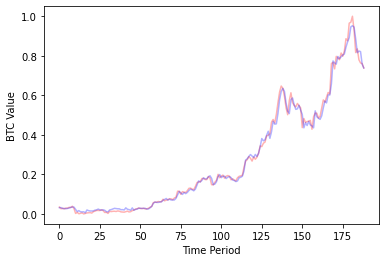

In [73]:
plt.plot(y_test, color = 'red', label = 'Real BTC Value', alpha = 0.3)
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Value', alpha = 0.3)
plt.xlabel("Time Period")
plt.ylabel("BTC Value")
plt.show()